<a href="https://colab.research.google.com/github/mortgad/DLVR/blob/main/multitask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# random bullshit go!

# Load Data

In [2]:
# Step 1: Install PyDrive
!pip install PyDrive

# Step 2: Import the required libraries
import os
import zipfile
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Step 3: Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Step 4: Specify the file ID from the link
file_id = '1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86'

# Step 5: Download the .zip file
downloaded = drive.CreateFile({'id': file_id})
zip_filename = 'downloaded_file.zip'  # Name of the downloaded zip file
downloaded.GetContentFile(zip_filename)

print(f"{zip_filename} downloaded successfully!")

# Step 6: Create the extracted directory if it doesn't exist
extract_dir = '/content/extracted'
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Step 7: Extract the .zip file into the /content/extracted directory
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"File extracted to {extract_dir}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyDrive: filename=PyDrive-1.3.1-py3-none-any.whl size=27433 sha256=209e4254dc2714bf09ec0a00936f22938485c407e426f4b1a52386391574e186
  Stored in directory: /root/.cache/pip/wheels/63/79/df/924c22c080c9dac1a57f611baa837fe0bc3daec1500b27f23b
Successfully built PyDrive


downloaded_file.zip downloaded successfully!
File extracted to /content/extracted


# Load Labels

In [3]:

# Step 1: Import the necessary libraries if not already imported
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

# Step 2: Authenticate and create the PyDrive client (if not already done)
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Step 3: Function to download CSV file from Google Drive
def download_csv(file_id, destination):
    downloaded = drive.CreateFile({'id': file_id})
    downloaded.GetContentFile(destination)
    print(f"Downloaded file saved as {destination}")

# Step 4: File IDs and destinations for Train and Validation labels
train_file_id = '1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH'  # Train labels file ID
val_file_id = '1wOdja-ezstMEp81tX1a-EYkFebev4h7D'    # Validation labels file ID

train_labels_path = '/content/train_labels.csv'
val_labels_path = '/content/val_labels.csv'

# Step 5: Download Train and Validation label CSV files
download_csv(train_file_id, train_labels_path)
download_csv(val_file_id, val_labels_path)

train_df = pd.read_csv(train_labels_path)
val_df = pd.read_csv(val_labels_path)

train_df.head()

Downloaded file saved as /content/train_labels.csv
Downloaded file saved as /content/val_labels.csv


,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True


# Data Preprocessing

  0%|          | 0/86744 [00:00<?, ?it/s]

  0%|          | 0/10954 [00:00<?, ?it/s]

  0%|          | 0/86744 [00:00<?, ?it/s]

  0%|          | 0/10954 [00:00<?, ?it/s]

  0%|          | 0/10954 [00:00<?, ?it/s]

  0%|          | 0/10954 [00:00<?, ?it/s]

Lists created successfully!
Validation lists created successfully!
image shape: (224, 224, 3)
age: 6
gender: 0
ethnicity: 1


array([[[ 8,  8, 10],
        [ 9,  9, 11],
        [10,  8, 11],
        ...,
        [45, 26, 20],
        [45, 24, 21],
        [45, 24, 21]],

       [[ 7,  7,  9],
        [ 8,  8, 10],
        [ 9,  7, 10],
        ...,
        [42, 25, 18],
        [41, 23, 19],
        [41, 23, 19]],

       [[ 6,  6,  8],
        [ 6,  6,  8],
        [ 8,  6,  7],
        ...,
        [35, 24, 18],
        [34, 23, 19],
        [34, 23, 19]],

       ...,

       [[42, 25, 31],
        [42, 25, 31],
        [43, 27, 30],
        ...,
        [20, 17, 10],
        [21, 18, 11],
        [20, 20, 10]],

       [[39, 27, 31],
        [39, 27, 31],
        [37, 27, 28],
        ...,
        [21, 18,  9],
        [22, 19, 10],
        [22, 20,  8]],

       [[37, 26, 30],
        [37, 26, 30],
        [35, 26, 27],
        ...,
        [24, 20, 11],
        [23, 21,  9],
        [23, 21,  9]]], dtype=uint8)
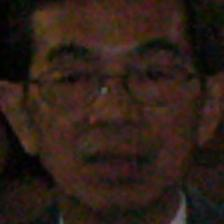

In [4]:
from pathlib import Path
from tqdm.notebook import tqdm  # For the progress bar (if not already installed, run: !pip install tqdm)

tqdm.pandas()

train_df = train_df.copy()
val_df = val_df.copy()

# Not sure what service_test is
train_df.drop(columns=['service_test'],inplace=True)
val_df.drop(columns=['service_test'],inplace=True)

# Define the base image directory
base_img = Path('/content/extracted')

# Update labels in both train_df and val_df
train_df['age'] = train_df['age'].replace('more than 70', '70+')
val_df['age'] = val_df['age'].replace('more than 70', '70+')

# Update the 'file' column for train and val dataframes
train_df['file'] = train_df['file'].progress_map(lambda x: base_img / x)
val_df['file'] = val_df['file'].progress_map(lambda x: base_img / x)

###### Mapping gender
gender_map = {'Male': 0, 'Female': 1}

train_df['gender_code'] = train_df['gender'].progress_map(lambda x:gender_map[x])
val_df['gender_code'] = val_df['gender'].progress_map(lambda x:gender_map[x])

###### Mapping age
age_order = ['0-2', '3-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Setting the desired order
train_df['age'] = train_df['age'].astype('category')
train_df['age'] = train_df['age'].cat.set_categories(age_order, ordered=True)

# Encoding the age groups
train_df['age_code'] = train_df['age'].cat.codes

# Creating the age map
age_map = dict(zip(train_df['age'].cat.categories, range(len(train_df['age'].cat.categories))))
val_df['age_code'] = val_df['age'].progress_map(lambda x: age_map[x])

###### Mapping race
train_df['race'] = train_df['race'].astype('category')
train_df['race_code'] = train_df['race'].cat.codes

race_map = dict(zip(train_df['race'].cat.categories,range(len(train_df['race'].cat.categories))))
val_df['race_code'] = val_df['race'].progress_map(lambda x:race_map[x])

# TESTING PURPOSES ONLY
train_df = train_df[:1000]
val_df = val_df[:100]

from PIL import Image
import numpy as np

# Lists to store the extracted data
images = []
ages = train_df['age_code'].tolist()  # List of age codes
genders = train_df['gender_code'].tolist()  # List of gender codes
ethnicities = train_df['race_code'].tolist()  # List of race codes

# Loading images based on the file paths in the 'file' column
for img_path in train_df['file']:
    try:
        # Open the image and convert it to a numpy array
        img = Image.open(img_path)
        img = np.array(img)  # Convert to a numpy array (optional, depending on how you want to handle images)
        images.append(img)  # Append the image to the list
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")

print("Lists created successfully!")

# Optionally, do the same for the validation dataframe (val_df)
val_images = []
val_ages = val_df['age_code'].tolist()
val_genders = val_df['gender_code'].tolist()
val_ethnicities = val_df['race_code'].tolist()

# Loading validation images
for img_path in val_df['file']:
    try:
        img = Image.open(img_path)
        img = np.array(img)
        val_images.append(img)
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")

print("Validation lists created successfully!")

print(f"image shape: {images[0].shape}")
print(f"age: {ages[0]}")
print(f"gender: {genders[0]}")
print(f"ethnicity: {ethnicities[0]}")
images[0]

# Modelling

In [ ]:
from keras.applications import mobilenet_v3
import keras
from keras import layers, models

conv_base = keras.applications.MobileNetV3Large(
    include_top=False,
    weights="imagenet",
)